In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [104]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Напишіть функцію гіпотези лінійної регресії у векторному вигляді

### Linear Regression

In [105]:
def h(w, X):
    return np.dot(X, w)

# Створіть функцію для обчислення функції втрат у векторному вигляді

### Loss function for multiple features

In [106]:
def loss_function(w, X, y):
    n = len(y)
    return np.sum((h(w, X) - y) ** 2) / (2 * n)

# Реалізуйте один крок градієнтного спуску

### Gradient descent for multiple features

In [107]:
def grad_descent(X, y, num_iter, learning_rate=0.001, epsilon=0.0000000001):
    n, m = X.shape
    X = np.hstack((np.ones((n, 1)), X))
    w = np.zeros(m + 1)
    loss_history = []

    for _ in range(num_iter):
        loss = loss_function(w, X, y)
        grad = np.dot(X.T, (h(w, X) - y)) / n
        w -= learning_rate * grad
        loss_history.append(loss)

        if len(loss_history) > 1 and abs(loss_history[-2] - loss_history[-1]) < epsilon:
            break

    return w, loss_history

# Знайдіть найкращі параметри для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

### Normalization

In [108]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    return (data - mean) / value_range

In [109]:
norm = pd.DataFrame()
norm['price'] = normalization(df['price'])
norm['area'] = normalization(df['area'])
norm['bedrooms'] = normalization(df['bedrooms'])
norm['bathrooms'] = normalization(df['bathrooms'])

#### Prepare the data

In [110]:
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values

#### Run gradient descent

In [111]:
weights_gradient_descent, loss_history = grad_descent(X, y, 1000, learning_rate=0.1)


### Аналітичне рішення

In [112]:
# Додавання стовпця одиниць до матриці X для вільного члена
X = np.hstack((np.ones((norm.shape[0], 1)), norm[['area', 'bedrooms', 'bathrooms']].values))

# Вектор цільових значень
y = norm['price'].values.reshape(-1, 1)

# Використання формули найменших квадратів для знаходження ваг
weights_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

#Sklearn

In [113]:
model = LinearRegression()

# Підготовка даних (X - фічі, y - цільова змінна)
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values

model.fit(X, y)

# Отримання вагів (коефіцієнтів) моделі
weights_sklearn = [model.intercept_] + list(model.coef_)

In [114]:
weights_gradient_descent

array([4.84984122e-17, 4.34508269e-01, 1.88961979e-01, 3.53955428e-01])

### Порівняйте отримані результати

In [127]:
param_names = ['area', 'bedrooms', 'bathrooms']

print("Порівняння ваг з градієнтного спуску, аналітичного рішення та Sklearn:")
for i, name in enumerate(param_names, start=1):
    print(f"{name}:")
    print(f"  Градієнтний спуск: {weights_gradient_descent[i]}")
    analytical_weight_scalar = weights_analytical[i].item()
    print(f"  Аналітичне рішення: {analytical_weight_scalar}")
    sklearn_weight_scalar = weights_sklearn[i]
    print(f"  Sklearn: {sklearn_weight_scalar}")
    print()

Порівняння ваг з градієнтного спуску, аналітичного рішення та Sklearn:
area:
  Градієнтний спуск: 0.4345082690098991
  Аналітичне рішення: 0.4771426895812342
  Sklearn: 0.4771426895812342

bedrooms:
  Градієнтний спуск: 0.18896197902857417
  Аналітичне рішення: 0.17611256873124853
  Sklearn: 0.17611256873124742

bathrooms:
  Градієнтний спуск: 0.3539554284984645
  Аналітичне рішення: 0.36001285656908977
  Sklearn: 0.3600128565690904



#Візуалізація отриманих результатів

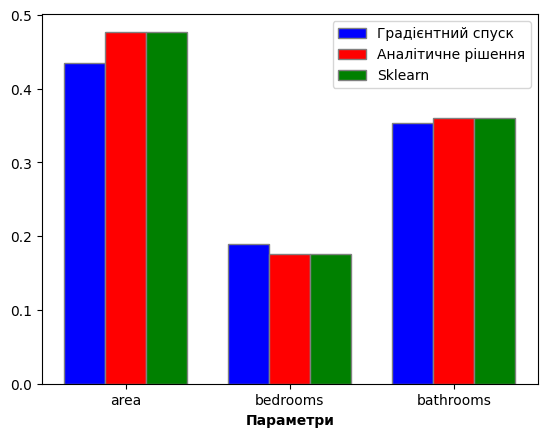

In [128]:
barWidth = 0.25
r1 = np.arange(len(weights_gradient_descent_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, weights_gradient_descent_plot, color='blue', width=barWidth, edgecolor='gray', label='Градієнтний спуск')
plt.bar(r2, weights_analytical_plot, color='red', width=barWidth, edgecolor='gray', label='Аналітичне рішення')
plt.bar(r3, weights_sklearn_plot, color='green', width=barWidth, edgecolor='gray', label='Sklearn')

# Додавання назв
plt.xlabel('Параметри', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(weights_gradient_descent_plot))], param_names)

plt.legend()
plt.show()